In [38]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
participants = pd.read_csv("pdwc2017_anonym.csv", parse_dates=['Order Date', 'Check-In Date'])

In [8]:
participants.head()

,Attendee Status,Order Date,Check-In Date,Would you like a T-Shirt?,What size?,Job Title,Participant Type,Call Type,Country,City
0,Checked In,2017-06-16 14:31:21.996,2017-10-19 10:35:00,Yes,Unisex Medium,J.Data Scientist,Individual,Early Bird,Poland,Warsaw
1,Attending,2017-06-16 15:39:10.002,NaT,Yes,Unisex Medium,Manager,Individual,Early Bird,Poland,Wielkie Drogi
2,Checked In,2017-06-19 09:45:10.999,2017-10-19 11:54:00,Yes,Unisex Large,Data Scientist,Individual,Early Bird,Poland,Warsaw
3,Checked In,2017-06-20 17:00:41.996,2017-10-19 10:01:00,Yes,Unisex Small,None,Individual,Early Bird,Poland,Warsaw
4,Attending,2017-06-20 23:09:45.003,NaT,Yes,Unisex XL,solution architect,Individual,Early Bird,Poland,Warsaw


In [37]:
# percent of people who showed up
100 * (participants['Attendee Status'] == "Checked In").mean()

90.843373493975903

In [52]:
participants['Country'].value_counts()

Poland              332
Germany              16
United Kingdom       10
Denmark              10
Netherlands           6
Spain                 5
Sweden                5
United States         5
Unknown Location      4
Ukraine               3
Czech Republic        3
Norway                3
Ireland               3
Italy                 2
Romania               2
France                2
Israel                1
Portugal              1
Latvia                1
Switzerland           1
Name: Country, dtype: int64

In [54]:
participants.loc[lambda df: df['Country'] == "Poland"]['City'].value_counts().head(5)

Warsaw       181
Krakow        34
Poznan        23
Białystok     20
Wrocław        9
Name: City, dtype: int64

In [56]:
participants.loc[lambda df: df['Country'] != "Poland"]['City'].value_counts().head(5)

London           8
Frederiksberg    7
Stockholm        5
Madrid           4
Oslo             3
Name: City, dtype: int64

In [59]:
# total number of countries
len(participants['Country'].value_counts())

20

In [58]:
# total number of cities
len(participants['City'].value_counts())

69

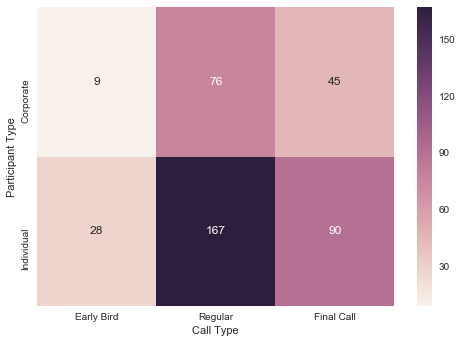

In [47]:
ticket_types = pd.pivot_table(participants, index='Participant Type',
                               columns='Call Type', values='Attendee Status', aggfunc=len)
ticket_types = ticket_types.loc[:, ['Early Bird', 'Regular', 'Final Call']]
sns.heatmap(ticket_types, annot=True, fmt="d")

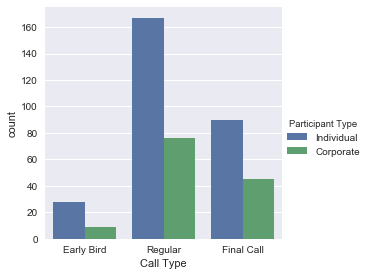

In [50]:
sns.factorplot(data=participants, x="Call Type", hue="Participant Type", kind="count")

In [120]:
# percent of people wanting a t-shirt
100 * (participants['Would you like a T-Shirt?'] == "Yes").mean()

89.638554216867476

In [16]:
tshirts = participants["What size?"].dropna().apply(lambda x: x.replace("Unisex ", "")).value_counts()
tshirts

Large             125
Medium            122
XL                 52
Small              45
XXL                13
X-Small             8
Medium | Large      4
Small | Medium      2
Large | XL          1
XL | XXL            1
Name: What size?, dtype: int64

Text(0,0.5,'Participants')

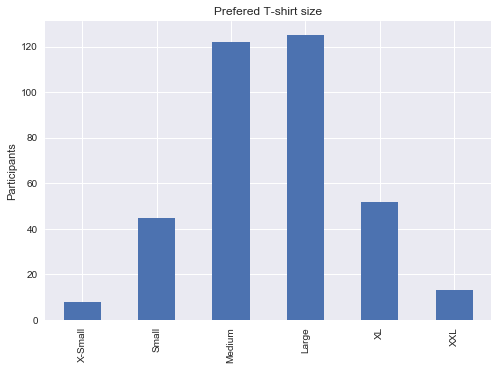

In [39]:
tshirts.loc[['X-Small', 'Small', 'Medium', 'Large', 'XL', 'XXL']].plot(kind='bar')
plt.title("Prefered T-shirt size")
plt.ylabel("Participants")

Text(0,0.5,'Participants')

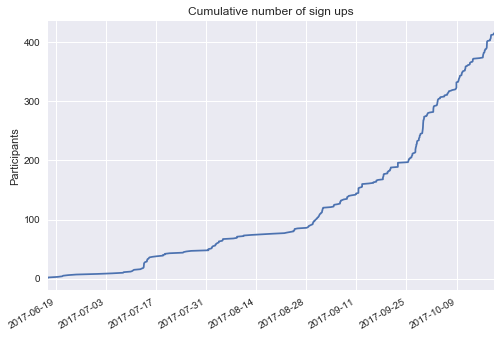

In [114]:
order_dates = participants["Order Date"].sort_values()
pd.Series(range(1, len(order_dates) + 1), index=order_dates).plot()
plt.title("Cumulative number of sign ups")
plt.xlabel("")
plt.ylabel("Participants")

Text(0,0.5,'Participants')

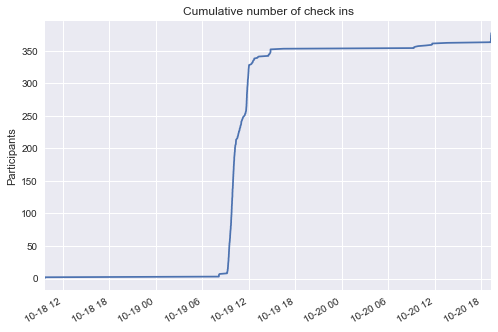

In [41]:
checkin_dates = participants["Check-In Date"].dropna().sort_values()
pd.Series(range(1, len(checkin_dates) + 1), index=checkin_dates).plot()
plt.title("Cumulative number of check ins")
plt.xlabel("")
plt.ylabel("Participants")

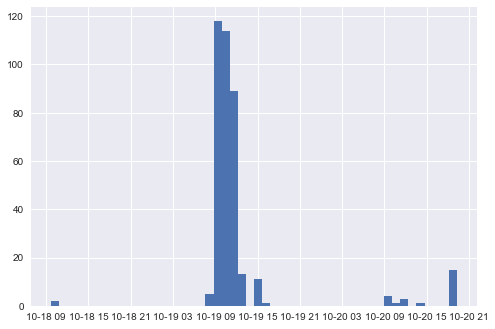

In [42]:
checkin_dates.hist(bins=50)

In [72]:
import datetime

In [84]:
checkin19 = checkin_dates.loc[checkin_dates.apply(lambda x: x.day == 19)]


Text(0,0.5,'Participants')

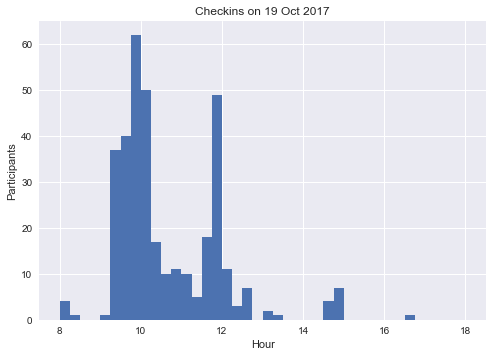

In [91]:
checkin19.apply(lambda x: x.hour + x.minute/60).hist(range=(8, 18), bins=40)
plt.title("Checkins on 19 Oct 2017")
plt.xlabel("Hour")
plt.ylabel("Participants")

In [96]:
times = participants.loc[checkin19.index, ["Order Date", "Check-In Date"]]

In [117]:
times_secs = times.applymap(lambda x: (x - pd.Timestamp(datetime.date(2017, 10, 19))).total_seconds()) 

In [119]:
times_secs.corr()

,Order Date,Check-In Date
Order Date,1.000000,-0.123597
Check-In Date,-0.123597,1.000000


In [63]:
participants["Job Title"].value_counts().head(10)

Data Scientist        60
Student               19
Software Engineer     12
Developer             10
Software Developer     9
student                8
CTO                    8
Phyton Developer       7
PhD student            6
softeare developer     5
Name: Job Title, dtype: int64

In [71]:
participants["Job Title"].value_counts().head(20)

Data Scientist              60
Student                     19
Software Engineer           12
Developer                   10
Software Developer           9
student                      8
CTO                          8
Phyton Developer             7
PhD student                  6
softeare developer           5
Junior Data Scientist        5
Development                  5
Software developer           4
Programmer                   4
Senior Software Engineer     4
R&D Engineer                 4
Senior Data Scientist        3
Junior Specialist            3
Consultant                   3
Python Developer             3
Name: Job Title, dtype: int64

In [69]:
from collections import Counter
words = Counter()
for index, title in participants["Job Title"].items():
    words.update(title.lower().split())
words.most_common(20)

[('data', 105),
 ('scientist', 85),
 ('developer', 66),
 ('engineer', 51),
 ('software', 47),
 ('student', 35),
 ('senior', 23),
 ('junior', 16),
 ('analyst', 16),
 ('consultant', 12),
 ('manager', 11),
 ('specialist', 10),
 ('team', 9),
 ('python', 9),
 ('phd', 9),
 ('head', 8),
 ('lead', 8),
 ('cto', 8),
 ('of', 8),
 ('science', 8)]